## Sound Confusion Matrix

Right의 balanced_accuracy: 0.612141246903048


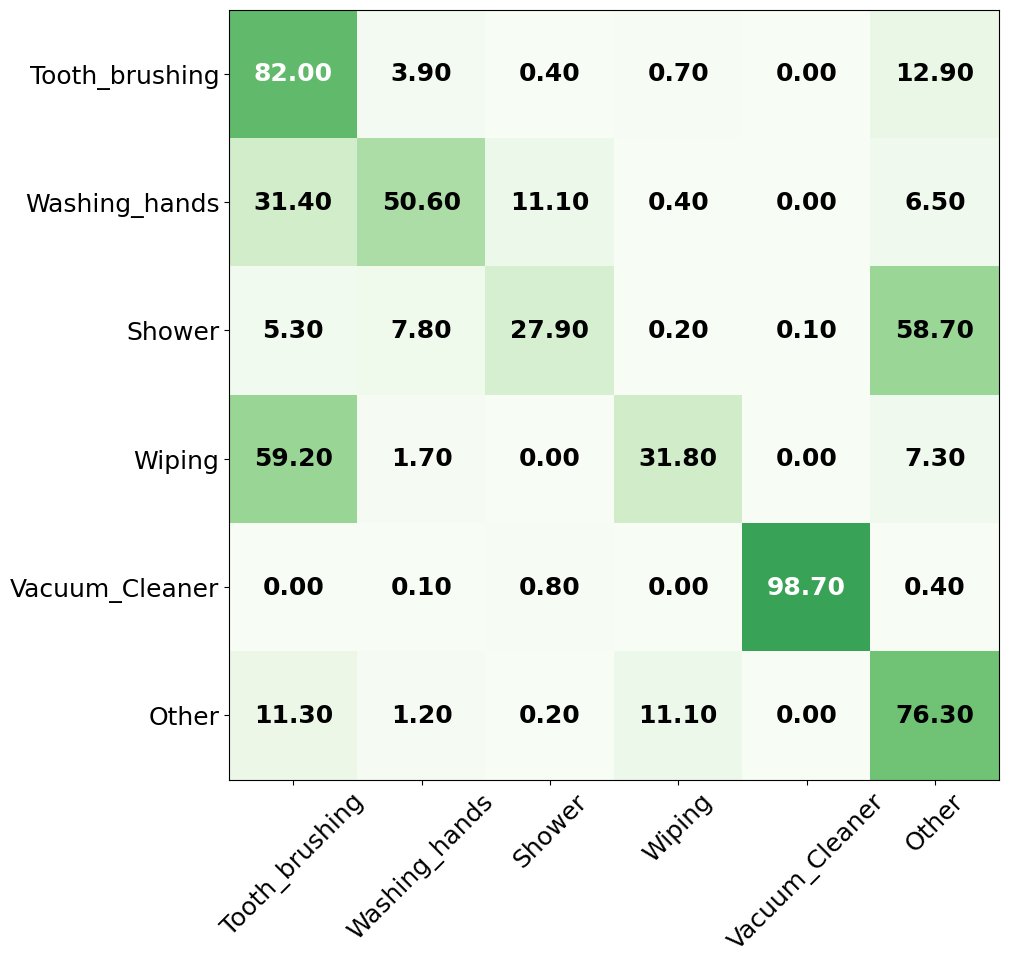

In [1]:
# Audio Model Evaluation: Balanced Accuracy & Confusion Matrix per Hand
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from pathlib import Path

# Configuration
MODEL_VERSION = 5
BASE_RESULTS_DIR = Path("../../Result/Model_Preds/Audio") / f"Audio_ver{MODEL_VERSION}"
SAMPLING_RATE = "16000"
CLASS_NAMES = [
    'Tooth_brushing', 'Washing_hands', 'Shower',
    'Wiping', 'Vacuum_Cleaner', 'Other'
]

def load_predictions(hand_dir: Path) -> (list, list):
    """
    Load y_true and y_pred across all CSVs under hand_dir/SAMPLING_RATE.
    """
    y_true, y_pred = [], []
    data_dir = hand_dir / SAMPLING_RATE
    for csv_file in data_dir.glob("*.csv"):
        df = pd.read_csv(csv_file)
        y_true.extend(df['y_true'])
        y_pred.extend(df['y_pred'])
    return y_true, y_pred


def plot_confusion_matrix(cm_pct: np.ndarray, hand: str):
    """
    Display a confusion matrix heatmap with percentages.
    """
    fig, ax = plt.subplots(figsize=(12, 10))
    im = ax.imshow(cm_pct, interpolation='nearest', cmap='Greens', vmin=0, vmax=100)

    ax.set_xticks(np.arange(len(CLASS_NAMES)))
    ax.set_yticks(np.arange(len(CLASS_NAMES)))
    ax.set_xticklabels(CLASS_NAMES, rotation=45, ha='right', fontsize=14)
    ax.set_yticklabels(CLASS_NAMES, fontsize=14)

    thresh = cm_pct.max() / 2
    for i in range(cm_pct.shape[0]):
        for j in range(cm_pct.shape[1]):
            color = 'white' if cm_pct[i,j] > thresh else 'black'
            ax.text(j, i, f"{cm_pct[i,j]:.1f}%", ha='center', va='center', color=color)

    ax.set_title(f"Confusion Matrix ({hand})", fontsize=16)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()


def evaluate_hand(hand_dir: Path):
    hand = hand_dir.name
    y_true, y_pred = load_predictions(hand_dir)

    ba = balanced_accuracy_score(y_true, y_pred)
    print(f"{hand} - Balanced Accuracy: {ba:.4f}")

    cm = confusion_matrix(y_true, y_pred, labels=CLASS_NAMES)
    cm_pct = cm.astype(float) / cm.sum(axis=1)[:, None] * 100
    cm_pct = np.nan_to_num(cm_pct)

    plot_confusion_matrix(cm_pct, hand)


if __name__ == '__main__':
    for hand_dir in sorted(BASE_RESULTS_DIR.iterdir()):
        if hand_dir.is_dir():
            evaluate_hand(hand_dir)